# Import libraies

In [ ]:
import pandas as pd # it is a name given to bar graph #it is given library
import numpy as np # it is a numerical function
import matplotlib.pyplot as plt # it is to plot on graph on y axis & x axis
import seaborn as sns # it is a visualisation
from sklearn.model_selection import train_test_split # It is to split the  data  into training and testing
from sklearn.linear_model import LinearRegression # it is a data tp predict the value is called linear regression
from sklearn.metrics import mean_squared_error, r2_score # it is a matrix which has rows and columns
from sklearn.preprocessing import StandardScaler # It is to remove unwanted value and make it more standard

# load datasheet

In [ ]:
from sklearn.datasets import fetch_california_housing #it is different program from boston

housing = fetch_california_housing() #it is a given program

df = pd.DataFrame(housing.data, columns=housing.feature_names) # it is simmilar to pandas

df['PRICE'] = housing.target # It is a price listed for houses

print("Dataset Shape:", df.shape) # print
print(df.head())

Dataset Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


# EDA (Optional Visualization)

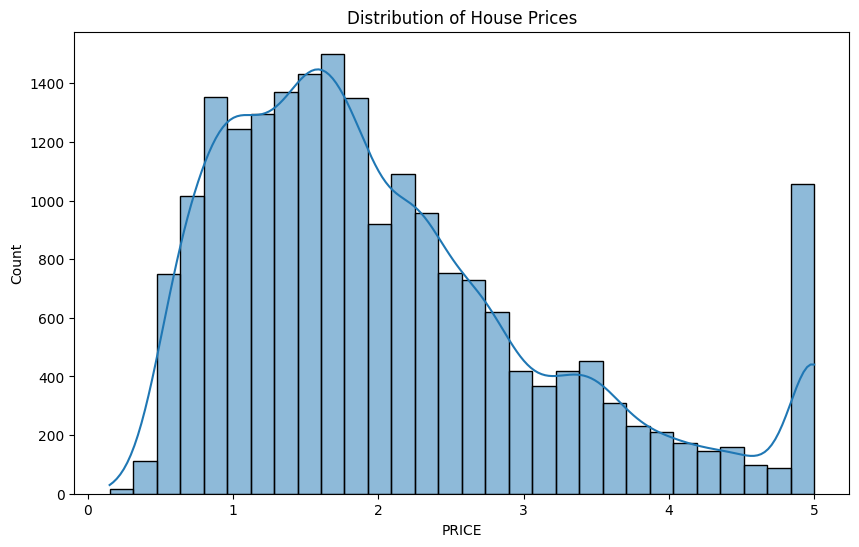

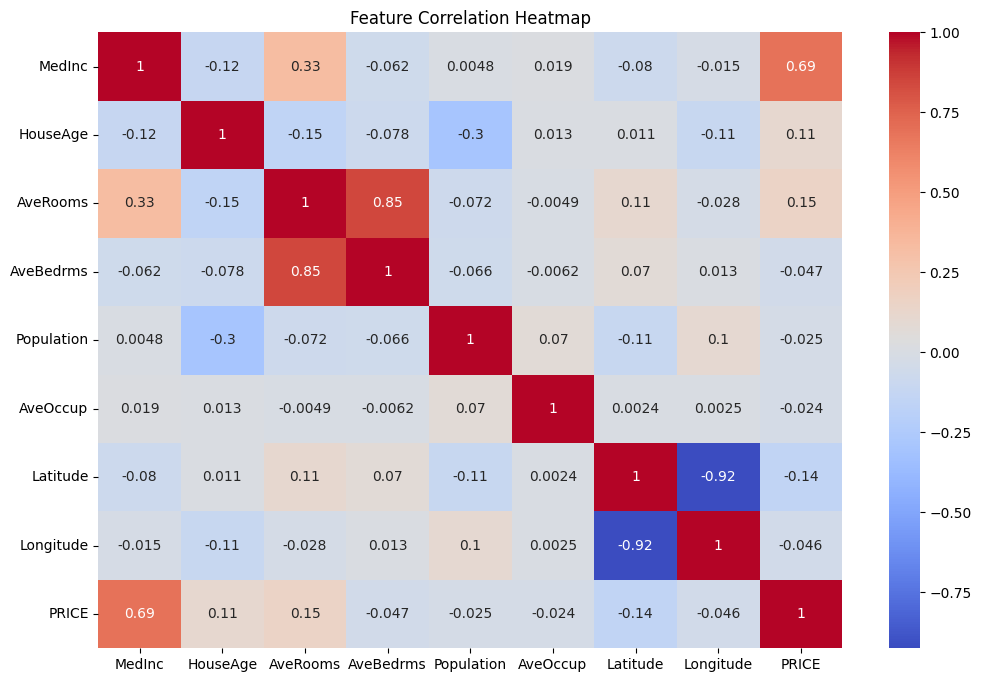

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=30, kde=True) #to  create a histogram graph and plot
plt.title("Distribution of House Prices") #title
plt.show() #display the graph

plt.figure(figsize=(12, 8))
sns.heatmap (df.corr(), annot=True, cmap="coolwarm") #to create a heatmap and coolwarm
plt.title("Feature Correlation Heatmap") # title
plt.show() #display  the heat and cool signatures

In [ ]:
X = df.drop('PRICE', axis=1)
y = df['PRICE'] #to give any price

# Feature selection & target

# Train-Test Split

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #to split the train and test ,train and test size should be 80-20 so that 80% is considered as high possibility and 20% is less possibility,,and random state means it helps us to give accurate score

# Feature Scaling

In [ ]:
scaler = StandardScaler() #It is to remove unwanted value and make it more standard

X_train = scaler.fit_transform(X_train) #it is a training set

x_test = scaler.transform(x_test)  # it is getting transform



# Model Training

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

#Predictions

In [ ]:
y_pred = model.predict(x_test) #to predict house price

#Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred) #cal of mean squared error
rmse =  np.sqrt(mse)  #to cal root mean squared error
r2 = r2_score(y_test, y_pred)   #to cal r squared of score

print(f"Mean Squared Error: {mse:.2f}")  #to print mean squared error
print(f"Root Mean Squared Error: {rmse:.2f}")  #to print root mean squared error
print(f"R^2: {r2:.2f}")  #root squared

Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R^2: 0.58


#Comparing Actual vs Predicted

In [ ]:
Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  #comparing between actual and predit value

print(Comparison.head())


        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657


# Visualization of Predictions

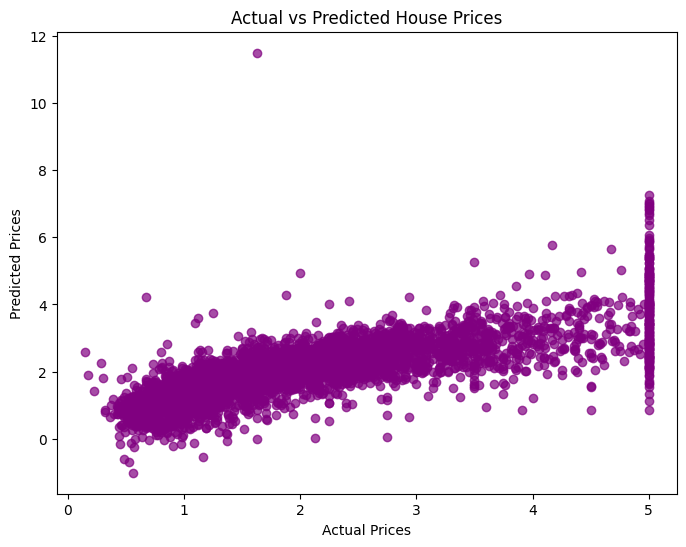

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="purple") #to give alpha and color
plt.xlabel("Actual Prices") #to give x axis name
plt.ylabel("Predicted Prices") # to give y axis name
plt.title("Actual vs Predicted House Prices") #to give title of the plot
plt.show() #to display the plot